# BONUS PART Implement the solution to the heat equation for images 

**(40 points):**

Follow the slides and create an ipython notebook called `heatImage.ipynb` that implements the numerical solution to the 2D heat equation using an image as the starting “temperature” L(i,j,n), where i,j index pixels and n indexes the time step.

The easiest way is to simply use the final equation on the final slide and loop over all pixels to create the next estimate of L(i,j,n+1). You have to be a little careful with how you treat the pixels at the edge...

Use the sunflower image from above and run 100 time steps, plotting the result every 10 time steps.

# Setup

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

from tqdm.auto import tqdm

# Heat Equation

<img width="901" alt="image" src="https://user-images.githubusercontent.com/37654013/115137839-5c8ec900-a063-11eb-948e-e3e36db530b0.png">


In [24]:
L = plt.imread('image.jpeg')

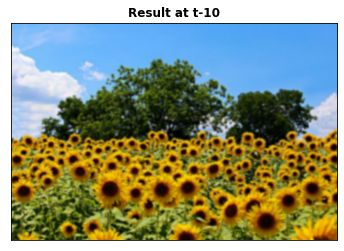

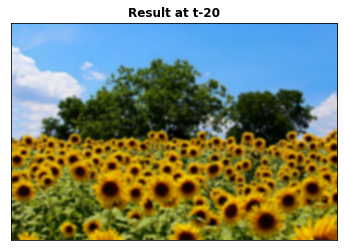

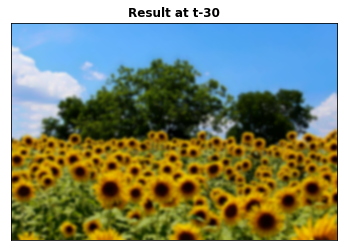

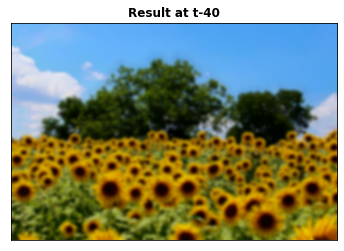

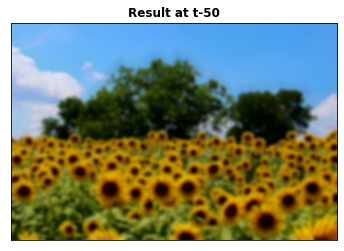

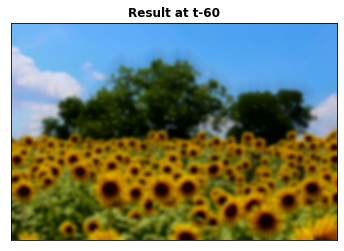

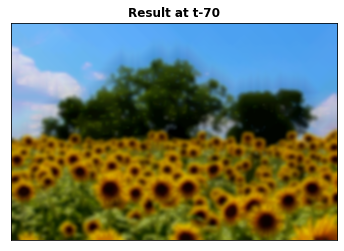

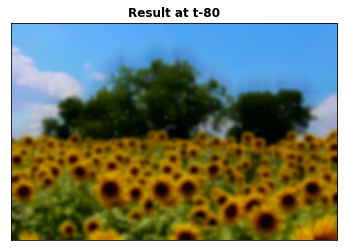

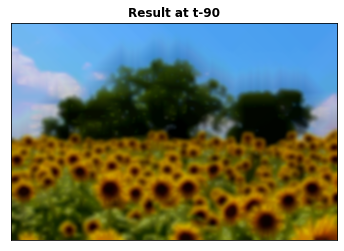

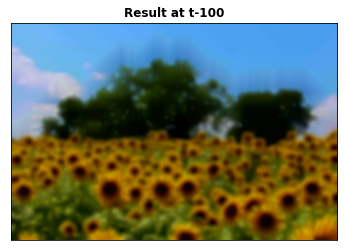

In [27]:
w, h, c = L.shape

dx, dy = 2, 2

T = 100
for t in range(T):
    L_next = np.zeros_like(L)
    for k in range(c):
        for i in range(h):
            for j in range(w):
                
                if i+1 == h:
                    L_next_i = L[j,i,k]
                else:
                    L_next_i = L[j,i+1,k]
                
                if j+1 == w:
                    L_next_j = L[j,i,k]
                else:
                    L_next_j = L[j+1,i,k]
                
                if i-1 < 0:
                    L_prev_i = L[j,i,k]
                else:
                    L_prev_i = L[j,i-1,k]
                
                if j-1 < 0:
                    L_prev_j = L[j,i,k]
                else:
                    L_prev_j = L[j-1,i,k]
                    
                L_next[j,i,k] = L[j,i,k] + ((L_next_i - 2 * L[j,i,k] + L_prev_i)/(dx**2) + (L_next_j - 2 * L[j,i,k] + L_prev_j)/(dy**2))
    L = L_next
    
    if t%10==9:
        plt.imshow(L)
        plt.xticks([])
        plt.yticks([])
        plt.title('Result at t-%d' % (t+1), fontweight='bold')
        plt.show()